## Tarea 1_ Red neuronal Perceptrón multicapa  

En esta primera tarea es necesario que realicen  un clasificador de prendas de ropa  para esto será necesario usar el  conjunto de entrenamiento Fashion Mnist

Este conjunto está conformado por fotografías de 10 diferentes estilos de ropa en imagenes de 28X28 

El clasificador debe de ser capaz de separar adecuadamente las diferentes imágenes.  Con este tipo de red se tiene una expectativa de un 97%  de exactitud.

    - Realizar la red neuronal programada completamente con TensorFlow
    - Realizar la misma arquitectura con Keras  

Adjunto encontrarán el código que ya tiene incorporada la lectura del conjunto de datos


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lectura del conjunto de datos 

In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data

## Separando el conjunto de datos en Entrenamiento y prueba 

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
def num_to_onehot(num):
    arr = np.zeros(10)
    arr[num] = 1
    return arr

def convert_labels(nums):
    return np.array([num_to_onehot(num) for num in nums])

Analizando el conjunto de Fashion_mnist

In [5]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in img]))

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


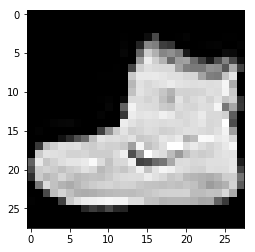

In [6]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)
plt.imshow(x_train[0], cmap='gray')

In [7]:
image_matrix(x_train[0])

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0
   0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3
   0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15
   0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66
   0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127

Podemos Observar que el dataset no está normalizado, por ende se convertirá a una escala entre 0 y 1

x_train shape: (60000, 784) y_train shape: (60000, 10)
x_test shape: (10000, 784) y_test shape: (10000, 10)


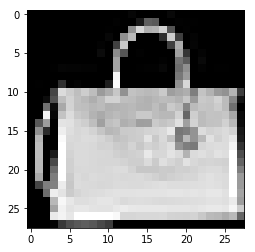

In [8]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape([60000, 28*28])
x_test = x_test.reshape([10000, 28*28])
y_train = convert_labels(y_train)
y_test = convert_labels(y_test)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)
imagendemo=np.reshape(x_test[30,:],(28,28))
plt.imshow(imagendemo,cmap='gray')

Las etiquetas numéricas pueden ser transformadas al nombre de la clase correspondiente usando el siguiente diccionario 

In [9]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

In [10]:
def Neural_network_model(
    keep_rate = 0.8,
    n_classes=10,
    lr = 0.001
    ):
    # Declarando las entradas y salidas
    x=tf.placeholder('float',[None,784])
    y=tf.placeholder('float')
    
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 28, 28, 1])
    # Declarando las variables 
    # tamKernel x tamKernel · profundidadKernel # numero de pixeles a compartir
    weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,1,32])),
               'W_conv2':tf.Variable(tf.random_normal([5,5,32,64])),
               'W_fc':tf.Variable(tf.random_normal([7*7*64,1024])),
               'out':tf.Variable(tf.random_normal([1024, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
               'b_conv2':tf.Variable(tf.random_normal([64])),
               'b_fc':tf.Variable(tf.random_normal([1024])),
               'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,1,1,1], padding='SAME')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    l1 = tf.nn.max_pool(l1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    #14*14*32
    
    l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,1,1,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    l2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    #7*7*64
    
    fc = tf.reshape(l2,[-1, 7*7*64])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])
    fc = tf.nn.dropout(fc, keep_rate)

    output = tf.matmul(fc, weights['out'])+biases['out']

    # Declarando la funcion de costo y entrenamiento
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output
                                                                   , labels=y) )
    optimizer = tf.train.AdamOptimizer(lr).minimize(cost)
    
    return dict(
              x=x,
              y=y,
              output=output,
              cost=cost,
              optimizer=optimizer
              )


In [11]:
Neural_network_model()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



{'x': <tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>,
 'y': <tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>,
 'output': <tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>,
 'cost': <tf.Tensor 'Mean:0' shape=() dtype=float32>,
 'optimizer': <tf.Operation 'Adam' type=NoOp>}

In [18]:
def train_neural_network(DNN, hm_epochs=10, batch_size=100):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            
            epoch_loss = 0
            for current_batch in range(int(len(x_train) / batch_size)):
                epoch_x = x_train[current_batch * batch_size : (current_batch + 1) * batch_size]
                epoch_y = y_train[current_batch * batch_size : (current_batch + 1) * batch_size]
                feed_dict={DNN["x"]: epoch_x, 
                           DNN["y"]: epoch_y}
                _, c, prediction,y   = sess.run([DNN["optimizer"], DNN["cost"]
                                                 , DNN["output"], DNN["y"]], 
                                                feed_dict=feed_dict)
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
            
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy train:',accuracy.eval({DNN["x"]:x_train, DNN["y"]:y_train}))
        #Prueba con datos nunca antes vistos  
        prediction, y = sess.run([DNN["output"], DNN["y"]], feed_dict={DNN["x"]:x_test, DNN["y"]:y_test})
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy test:', accuracy.eval())

In [36]:
DNN=Neural_network_model(lr = 0.003)
train_neural_network(DNN, hm_epochs=30, batch_size=100)
# Accuracy: 0.8715

#Accuracy train: 0.8875
#Accuracy test: 0.8448

Epoch 0 completed out of 30 loss: 1565696.8165740967
Epoch 1 completed out of 30 loss: 146773.00427246094
Epoch 2 completed out of 30 loss: 43565.56070804596
Epoch 3 completed out of 30 loss: 12567.725660324097
Epoch 4 completed out of 30 loss: 4920.836488485336
Epoch 5 completed out of 30 loss: 2229.728025317192
Epoch 6 completed out of 30 loss: 1252.9329141378403
Epoch 7 completed out of 30 loss: 883.8183122873306
Epoch 8 completed out of 30 loss: 748.4353168010712
Epoch 9 completed out of 30 loss: 696.0574064254761
Epoch 10 completed out of 30 loss: 650.3382838368416
Epoch 11 completed out of 30 loss: 675.2806038856506
Epoch 12 completed out of 30 loss: 627.4273849725723
Epoch 13 completed out of 30 loss: 634.1438400745392
Epoch 14 completed out of 30 loss: 649.3359035253525
Epoch 15 completed out of 30 loss: 708.6139975190163
Epoch 16 completed out of 30 loss: 611.611537694931
Epoch 17 completed out of 30 loss: 607.1092980504036
Epoch 18 completed out of 30 loss: 595.8462795615196
